In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Here's the current list of elections supported:
from metric_voting.elections import (
    SNTV,
    Bloc,
    Borda,
    STV,
    ChamberlinCourant,
    Monroe,
    PAV,
    GreedyCC,
    GreedyMonroe,
    PluralityVeto,
    CommitteeVeto,
    ExpandingApprovals, 
    OMRD, 
    SMRD, 
    DMRD,
)

from metric_voting.spatial_generation import *

%load_ext autoreload
%autoreload 2

In [2]:
# Colors for plotting!
colors = ["#0099cd","#ffca5d","#00cd99","#99cd00","#cd0099","#9900cd","#8dd3c7",
        "#bebada","#fb8072","#80b1d3","#fdb462","#b3de69","#fccde5","#bc80bd",
        "#ccebc5","#ffed6f","#ffffb3","#a6cee3","#1f78b4","#b2df8a","#33a02c",
        "#fb9a99","#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#b15928",
        "#64ffda","#00B8D4","#A1887F","#76FF03","#DCE775","#B388FF","#FF80AB",
        "#D81B60","#26A69A","#FFEA00","#6200EA",
    ]

voter_color = colors[0]
candidate_color = colors[1]
winner_color = colors[4]

Once we have a ranked preference profile, we can run elections with it, using any of the mechanisms in our suite of implemented methods. Consider the following examples:

### Profile Generation:

In [3]:
# Here's a spatially generated profile! 
n = 1000
m = 20
k = 4
voter_group_sizes = [int(n/2),int(n/2)]
candidate_group_sizes = [m]

In [4]:
# Parameters for the gaussian voter distributions:
voter_params = [
    {'loc': [0, -2], 'scale': 1/3, 'size': 2},
    {'loc': [0, 2], 'scale': 1/3, 'size': 2}
]
    
# Parameters for the uniform candidate distributions. 
candidate_params = [{'low': -3, 'high': 3, 'size': 2}]

# define a distance function between voters and candidates
distance = lambda point1, point2: np.linalg.norm(point1 - point2)

# Create the group spatial generator object!
generator = GroupSpatial(
    n_voter_groups = 2,
    n_candidate_groups = 1, 
    voter_dist_fns = [np.random.normal, np.random.normal],
    voter_dist_fn_params = voter_params,
    candidate_dist_fns = [np.random.uniform],
    candidate_dist_fn_params = candidate_params,
    distance_fn = distance
)

In [5]:
# Now each call .generate() will make a profile with random candidate and voter positions
(profile,
candidate_positions,
voter_positions,
candidate_labels,
voter_labels) = generator.generate(voter_group_sizes, candidate_group_sizes)

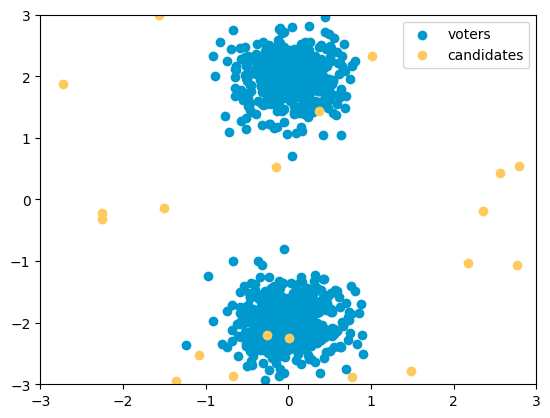

In [6]:
# visualize the results
pal = sns.color_palette("hls", 8)
plt.scatter(voter_positions[:,0], voter_positions[:,1], label = 'voters', color = voter_color)
plt.scatter(candidate_positions[:,0], candidate_positions[:,1], label = 'candidates', color = candidate_color, alpha = 1)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend()

# Running Elections

In [7]:
# To run an election, simply define the election class passing in an input information:
election = STV(transfer_type = 'weighted-fractional', tiebreak_type = 'fpv_random')

# Then simply call the .elect() method on the preference profile with the desired number of winners k
winners = election.elect(profile, k)

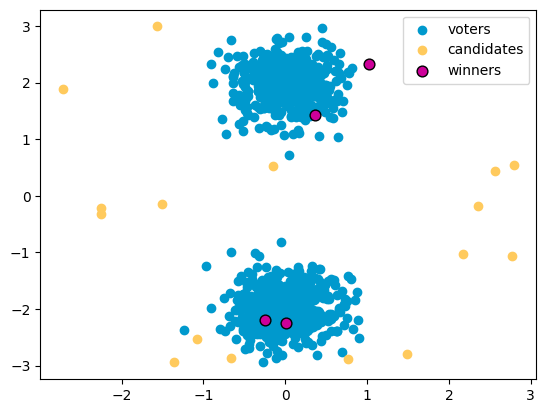

In [8]:
pal = sns.color_palette("hls", 8)
plt.scatter(voter_positions[:,0], voter_positions[:,1], label = 'voters', color = voter_color)
plt.scatter(candidate_positions[:,0], candidate_positions[:,1], label = 'candidates', color = candidate_color, alpha = 1)
plt.scatter(candidate_positions[winners,0], candidate_positions[winners,1], label = 'winners',
            color = winner_color, edgecolor ='black', alpha = 1, s = 60)
plt.legend()

It's as simple as that!